https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

https://www.thepythoncode.com/article/hog-feature-extraction-in-python

In [8]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np
import pandas as pd
from PIL import Image
from skimage import data, exposure
import pathlib

In [10]:
df = pd.read_csv('data/train_complete.csv')

In [11]:
image = io.imread("data/train_images/000418bfc.jpg")

In [12]:
#img = resize(color.rgb2gray(io.imread("data/train_images/000418bfc.jpg")), (64, 128))

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

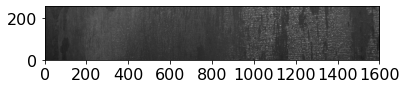

In [13]:
plt.imshow(image)
plt.xlim(0,1600)
plt.ylim(0,256)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [14]:
plt.imshow(img)
plt.xlim(0,128)
plt.ylim(0,64)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

NameError: name 'img' is not defined

The hog() function takes 6 parameters as input:

image: The target image you want to apply HOG feature extraction.

orientations: Number of bins in the histogram we want to create, the original research paper used 9 bins so we will pass 9 as orientations.

pixels_per_cell: Determines the size of the cell, as we mentioned earlier, it is 8x8.

cells_per_block: Number of cells per block, will be 2x2 as mentioned previously. ==> used for normalisation (16*16)

visualize: A boolean whether to return the image of the HOG, we set it to True so we can show the image.

multichannel: We set it to True to tell the function that the last dimension is considered as a color channel, instead of spatial.

In [ ]:
#without resized picture

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(32, 16), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [15]:
resized_img = resize(image, (64,128))

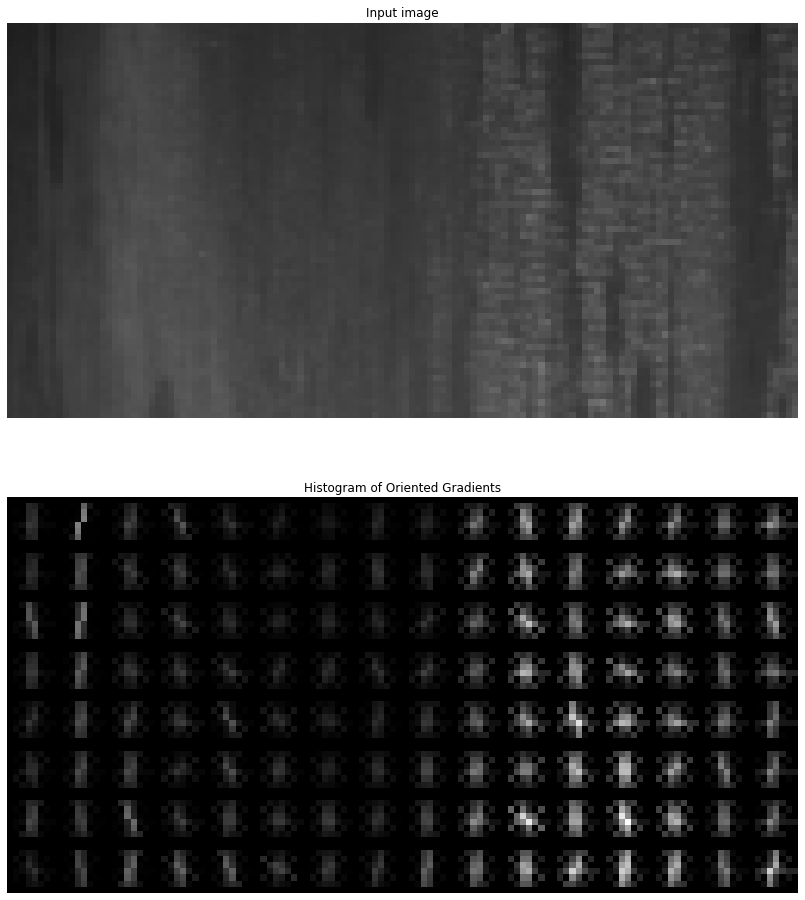

In [16]:
#with resized picture

fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(32, 16), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [17]:
# fd is Feature Matrix
fd.shape

(3780,)

https://programmerwiki.com/article/9173629512/

SCHRITT 1: VERARBEITEN SIE DIE DATEN VOR (64X128)

Wir müssen das Bild vorverarbeiten und das Seitenverhältnis auf 1: 2 reduzieren. Die Bildgröße beträgt vorzugsweise 64 x 128. Dies liegt daran, dass wir das Bild in 8 teilen8 und 1616 kleine Blöcke zum Extrahieren von Features. Tatsächlich ist dies genau der Wert, der im Originalpapier verwendet wird.

SCHRITT 2: BERECHNEN SIE DEN GRADIENTEN (X- UND Y-RICHTUNG)

Um nun den Gradienten in x-Richtung zu bestimmen, müssen wir den linken Wert vom rechten Pixelwert subtrahieren. Um den Gradienten in y-Richtung zu berechnen, subtrahieren wir den Pixelwert unten vom Pixelwert des ausgewählten Pixels.
Dieser Prozess liefert zwei neue Matrizen, von denen eine den Gradienten in x-Richtung und die andere den Gradienten in y-Richtung speichert.Wir haben die Gradienten in x- und y-Richtung getrennt berechnet. Wiederholen Sie den gleichen Vorgang für alle Pixel im Bild.

SCHRITT 3: BERECHNEN SIE DIE AMPLITUDE UND RICHTUNG

Anhand des Gradienten, den wir im letzten Schritt berechnet haben, bestimmen wir nun die Größe und Richtung jedes Pixelwerts. Für diesen Schritt verwenden wir den Satz von Pythagoras um die Gesamtgradientengröße zu berechnen.
Berechnen Sie als Nächstes die Richtung desselben Pixels. Wir wissen, dass wir den Winkel als tan schreiben können.
Nun haben wir für jeden Pixelwert den Gesamtgradienten (Größe) und die Richtung. Wir müssen diese Gradienten und Richtungen verwenden, um ein Histogramm zu erstellen.

SCHRITT 4: BERECHNEN SIE DAS HISTOGRAMM DES GRADIENTEN IN DER 8 × 8-EINHEIT (9 × 1)

x-Achse: Anzahl der gewählten Bins (beziehen sich auf Winkel); Anzahl entspricht Parameter: "Orientations"
y-Achse: Hier wird Größe des Pixelwertes (Amplitude) anteilig auf die jeweils zum Winkel benachbarten bins eingetragen. Bei 9 bins sind Abstände der bins =20. Wenn Winkel bspw. 36 dann werden (40-36)/20= 4/20 * Amplitudenwert auf bin mit Wert beginnend ab 40 eingetragen und (36-20)/20=16/20 * Amplitudenwert auf bin mit Wert ab 20.

SCHRITT 4: BERECHNEN SIE DAS HISTOGRAMM DES GRADIENTEN IN DER 8 × 8-EINHEIT (9 × 1)

Das im HOG-Feature-Deskriptor erstellte Histogramm wird nicht für das gesamte Bild generiert. Das Bild wird in 8 × 8 Zellen unterteilt und das Histogramm des Richtungsgradienten jeder Zelle berechnet.
Auf diese Weise erhalten wir kleine Blockmerkmale (oder Histogramme), die das gesamte Bild darstellen. Wir können diesen Wert natürlich von 8 x 8 auf 16 x 16 oder 32 x 32 ändern.
Wenn wir das Bild in 8 × 8-Zellen teilen und ein Histogramm erstellen, generieren wir die Matrix mit der im vorherigen Abschnitt beschriebenen Methode 4 und erhalten für jede Zelle eine 9 x 1-Matrix.

SCHRITT 5: NORMALISIEREN SIE DEN GRADIENTEN IN DER 16 × 16-EINHEIT (36 × 1).

Obwohl wir HOG-Funktionen für die 8 × 8-Einheiten des Bildes erstellt haben, ist der Gradient des Bildes sehr empfindlich für die Gesamtbeleuchtung. Dies bedeutet, dass für ein bestimmtes Bild einige Teile des Bildes im Vergleich zu anderen Teilen sehr hell sind.
Wir können diese Änderung der Beleuchtung jedoch reduzieren, indem wir 16 × 16 Blöcke verwenden, um den Gradienten zu normalisieren.
Hier kombinieren wir vier 8 × 8-Einheiten, um einen 16 × 16-Block zu erstellen. Und wir wissen bereits, dass jede 8 × 8-Zelle eine 9 × 1-Matrix für das Histogramm hat. Daher haben wir vier 9 × 1-Matrizen oder eine 36 × 1-Matrix. Um die Matrix zu normalisieren, teilen wir jeden dieser Werte durch die Quadratwurzel der Summe der Quadrate der Werte. Mathematisch für einen gegebenen Vektor V.

SCHRITT 6: MERKMALE DES GESAMTEN BILDES

Wir werden 105 (7 × 15) Blöcke von 16 × 16 haben. Jeder dieser 105 Blöcke hat einen 36 × 1-Vektor als Merkmal. Daher betragen die Gesamtmerkmale des Bildes 105 × 36 × 1 = 3780 Merkmale.

https://medium.com/swlh/histogram-of-oriented-gradients-hog-for-multiclass-image-classification-and-image-recommendation-cf0ea2caaae8

https://www.kaggle.com/anirbanmalick/image-classification-using-hog-knn-98-acc

In [18]:
# get current working directory
cwd = pathlib.Path.cwd()
train_data_dir = cwd.joinpath('data', 'train_images')

In [19]:
train_images = list(train_data_dir.glob('*.jpg'))


hog_images = []
hog_features = {'ImageId':[],'fd':[]}
for image in train_images:
    hog_features['ImageId'].append(image.name)
    image = io.imread("data/train_images/"+image.name)
    resized_img = resize(image, (64,128))
#    blur = cv.GaussianBlur(image,(5,5),0)
    fd,hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,channel_axis=-1)
    hog_images.append(hog_image)
    hog_features['fd'].append(fd)

hog_features = np.array(hog_features)

hog_features.shape


#,block_norm= 'L2'

In [20]:
hog_images = []
hog_features = []
Image_Ids = []
for image in train_images:
    Image_Ids.append(image.name)
    image = io.imread("data/train_images/"+image.name)
    resized_img = resize(image, (64,128))
#    blur = cv.GaussianBlur(image,(5,5),0)
    fd,hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,channel_axis=-1)
    hog_images.append(hog_image)
    hog_features.append(fd)
  
hog_features = np.array(hog_features)

hog_features.shape


#,block_norm= 'L2'

(12568, 3780)

In [21]:
#for img in hog_images[:20]:
 #   plt.imshow(img)
 #   plt.show()

In [22]:
#Image_Ids

In [23]:

hog_features= pd.DataFrame(hog_features)
hog_features

,0,1,2,3,4,5,6,7,8,9,...,3770,3771,3772,3773,3774,3775,3776,3777,3778,3779
0,0.260472,0.168138,0.260472,0.124914,0.117598,0.000000,0.023278,0.078617,0.071638,0.125196,...,0.244573,0.234058,0.048746,0.040422,0.015478,0.129134,0.126747,0.194180,0.159938,0.224502
1,0.178531,0.146213,0.230136,0.135276,0.239207,0.089580,0.097348,0.154742,0.089257,0.239207,...,0.275924,0.231136,0.044045,0.074165,0.047504,0.084607,0.057752,0.091826,0.118711,0.147404
2,0.233020,0.233020,0.233020,0.221273,0.198087,0.087594,0.057336,0.024053,0.085179,0.192792,...,0.166959,0.152660,0.048371,0.032045,0.092339,0.158407,0.255698,0.255698,0.255698,0.049551
3,0.199433,0.128030,0.110016,0.008214,0.155047,0.088910,0.155657,0.077873,0.260184,0.260184,...,0.223840,0.221356,0.080780,0.033171,0.142762,0.186500,0.197350,0.193555,0.223840,0.068564
4,0.357059,0.189545,0.000000,0.004834,0.050835,0.033951,0.123951,0.057806,0.084447,0.357059,...,0.361479,0.361479,0.050235,0.024185,0.011188,0.037392,0.007501,0.008185,0.022333,0.227738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563,0.307184,0.107164,0.036760,0.026387,0.125121,0.010923,0.079981,0.062923,0.206235,0.307184,...,0.258013,0.258013,0.074292,0.158503,0.043032,0.152954,0.043528,0.073125,0.113606,0.258013
12564,0.281730,0.240874,0.014224,0.055766,0.104895,0.012058,0.019042,0.092117,0.315406,0.315406,...,0.427692,0.242380,0.006836,0.000000,0.000000,0.002948,0.000000,0.000000,0.007591,0.137132
12565,0.117363,0.147319,0.253654,0.165281,0.239857,0.021668,0.016932,0.054552,0.125060,0.218005,...,0.204958,0.148534,0.045345,0.034623,0.076894,0.240943,0.172085,0.217826,0.186055,0.240943
12566,0.212728,0.242484,0.108226,0.047673,0.080457,0.144715,0.122294,0.122211,0.198313,0.181952,...,0.278250,0.278250,0.149900,0.062754,0.023076,0.143293,0.053385,0.050405,0.278250,0.278250


In [24]:
Image_Ids= pd.DataFrame(Image_Ids)
Image_Ids.rename(columns={0: 'ImageId'}, inplace=True)
Image_Ids

,ImageId
0,58ee62fd7.jpg
1,eeffa4c49.jpg
2,0dced41aa.jpg
3,bd2366c49.jpg
4,e2bdd4236.jpg
...,...
12563,cc00b69e7.jpg
12564,3a0e5cad8.jpg
12565,17d02873a.jpg
12566,97192a78b.jpg


In [25]:
hog_complete = pd.concat([hog_features, Image_Ids], axis=1, ignore_index=False)
hog_complete

,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,ImageId
0,0.260472,0.168138,0.260472,0.124914,0.117598,0.000000,0.023278,0.078617,0.071638,0.125196,...,0.234058,0.048746,0.040422,0.015478,0.129134,0.126747,0.194180,0.159938,0.224502,58ee62fd7.jpg
1,0.178531,0.146213,0.230136,0.135276,0.239207,0.089580,0.097348,0.154742,0.089257,0.239207,...,0.231136,0.044045,0.074165,0.047504,0.084607,0.057752,0.091826,0.118711,0.147404,eeffa4c49.jpg
2,0.233020,0.233020,0.233020,0.221273,0.198087,0.087594,0.057336,0.024053,0.085179,0.192792,...,0.152660,0.048371,0.032045,0.092339,0.158407,0.255698,0.255698,0.255698,0.049551,0dced41aa.jpg
3,0.199433,0.128030,0.110016,0.008214,0.155047,0.088910,0.155657,0.077873,0.260184,0.260184,...,0.221356,0.080780,0.033171,0.142762,0.186500,0.197350,0.193555,0.223840,0.068564,bd2366c49.jpg
4,0.357059,0.189545,0.000000,0.004834,0.050835,0.033951,0.123951,0.057806,0.084447,0.357059,...,0.361479,0.050235,0.024185,0.011188,0.037392,0.007501,0.008185,0.022333,0.227738,e2bdd4236.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563,0.307184,0.107164,0.036760,0.026387,0.125121,0.010923,0.079981,0.062923,0.206235,0.307184,...,0.258013,0.074292,0.158503,0.043032,0.152954,0.043528,0.073125,0.113606,0.258013,cc00b69e7.jpg
12564,0.281730,0.240874,0.014224,0.055766,0.104895,0.012058,0.019042,0.092117,0.315406,0.315406,...,0.242380,0.006836,0.000000,0.000000,0.002948,0.000000,0.000000,0.007591,0.137132,3a0e5cad8.jpg
12565,0.117363,0.147319,0.253654,0.165281,0.239857,0.021668,0.016932,0.054552,0.125060,0.218005,...,0.148534,0.045345,0.034623,0.076894,0.240943,0.172085,0.217826,0.186055,0.240943,17d02873a.jpg
12566,0.212728,0.242484,0.108226,0.047673,0.080457,0.144715,0.122294,0.122211,0.198313,0.181952,...,0.278250,0.149900,0.062754,0.023076,0.143293,0.053385,0.050405,0.278250,0.278250,97192a78b.jpg


In [26]:
hog_complete.to_csv('data/train_HOG.csv', sep=',',index=False)